In [11]:
import numpy as np
import matplotlib.pyplot as plt

#9.1 a

$(x-1)^2 - \dfrac{e^x}{2} = 0$

In [12]:
x = [0.2, 0.25, 0.27, 0.3]

y = [0.029, -0.080, -0.122, -0.185]
n =4



приблизим зависимость $x(y)$ многочленом ( в форме Лагранжа)

---



In [13]:
def l(i, y1):
    r = 1.
    for j in range(n):
        if i != j:
            r *= (y1 - y[j])/(y[i] - y[j])
    return r

In [14]:
def func(y1):
    r = 0
    for i in range(n):
        r += l(i, y1)*x[i]
    return r

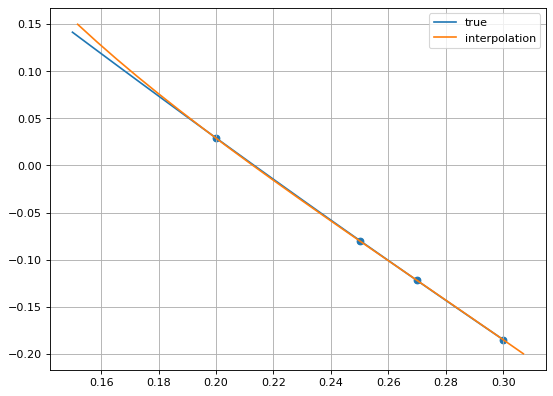

In [15]:
plt.figure(figsize=(8, 6), dpi=80)

plt.scatter(x, y)

x0 = np.linspace(0.15, 0.3, 20)
plt.plot(x0, (x0-1)**2 - np.exp(x0)/2, label='true')

y0 = np.linspace(-0.2, 0.15, 20)

plt.plot(func(y0), y0, label='interpolation')

plt.legend()
plt.grid()
plt.show()

Тогда корень исходного уравнения x = f(0)

In [16]:
print(func(0))

0.21288120069524213


Точное решение:

In [17]:
from scipy.optimize import fsolve

def myFunction(x):
    return (x-1)**2 - np.exp(x)/2

print(fsolve(myFunction, 0))

print(func(0) - fsolve(myFunction, 0))

[0.21330863]
[-0.00042743]


Погрешность!!!!!!!!!!!!!!!!!!!!!!!!!!
 
 Погрешность метода: $R_{meth} = \dfrac{|f^{(4)}(\xi)|}{4!} || ω_4(x) || $

 $f'_y = \frac{1}{y'(x)} = \frac{1}{2(x-1) - e^x/2} $


$ f''_{yy} = \dfrac{d f'_y}{dx} \dfrac{d x }{dy} = \dfrac{d f'_y}{dx} \dfrac{1}{y'(x)}$

это неприятно считать честно, поэтому давайте скажем $y' \approx 2.1$

вольфрам

 $ \frac {d^3}{dx^3}  \frac{1}{2 x - 2 - exp(x)/2)} = \frac{2 (4 e^x (x - 5) + 4 e^x + 2 e^{2 x})}{(4 x - e^x - 4)^3} - \frac{6 (4 - e^x) (4 e^x (x - 5) + e^{2 x} + 32)}{(4 x - e^x - 4)^4} $

при $x \in [0.2, 0.3] $ производная ограничивается как $0 \le |f^{(4)} (x)| \le  \frac{0.077}{2.1^3} = 8 e-3 $ 

$|| ω_4(x) || = 2.38e-6 $

и окончательно

$R_{meth} \le 8e-10$

*Неустранимая* погрешность

$R = \sum_i \Delta f |l_i(x)|$

In [18]:
r = 0

for i in range(n):
    r += abs(l(i, 0))

print(r)

3.1484384776721583


две знаащие цифры

$ R = 0.005 * 3.14  = 1.6e-2$

#9.2 b


$f'(0.3) $ ?

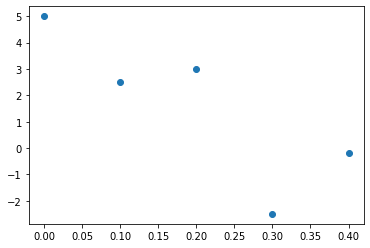

In [19]:
x =[0, 0.1,0.2, 0.3, 0.4]

y = [ 5, 2.5, 3, -2.5, -0.2]

plt.scatter(x, y)

In [20]:
n = 5

In [21]:
def l(i, x1):
    r = 1.
    for j in range(n):
        if i != j:
            r *= (x1 - x[j])/(x[i] - x[j])
    return r

In [22]:
def func(x1):
    r = 0
    for i in range(n):
        r += l(i, x1)*y[i]
    return r

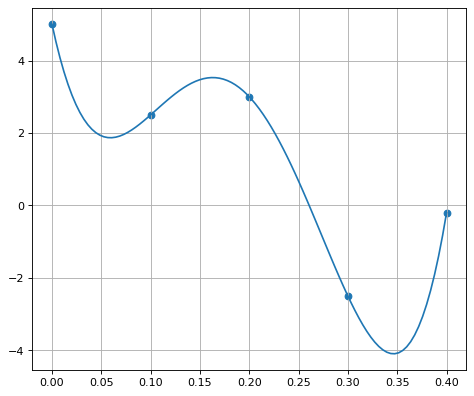

In [23]:
plt.figure(figsize=(7, 6), dpi=80)

plt.scatter(x, y)

x0 = np.linspace(0., 0.4, 100)
 
plt.plot(x0, func(x0))

plt.grid()
plt.show()

# 8.12 

посчитаем

In [24]:
x = [0, np.pi/6, np.pi/4, np.pi/3]

x0 = np.pi/5

r = 1.
for i in range(4):
    for j in range(4):
        if i != j:
            r *= (x0-x[j]) / (x[i] - x[j])

print(abs(r))

0.00033973862400000056


#8.18b



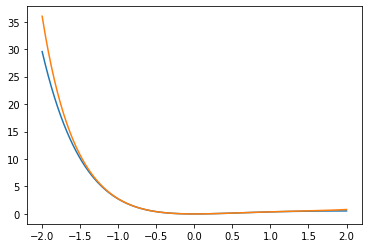

In [25]:
x = np.linspace(-2,2,100)

plt.plot(x, x**2*np.exp(-x))
plt.plot(x, x**2 * (x**2/6 - 2*x/3 +1)/(1+x/3))

#9.2

In [26]:
A = np.zeros((5,5))
x = np.linspace(0, 0.4, 5)
print(x)
f = np.zeros(5)


for i in range(5):
    f[i] = i * 0.3**(i-1)
    for j in range(5):
        A[j][i] = x[i]**j

print(A, f)

sol = np.linalg.solve(A, f)
print(np.dot(sol, np.array([5, 2.5, 3, -2.5, -0.2])))


[0.  0.1 0.2 0.3 0.4]
[[1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00]
 [0.00e+00 1.00e-01 2.00e-01 3.00e-01 4.00e-01]
 [0.00e+00 1.00e-02 4.00e-02 9.00e-02 1.60e-01]
 [0.00e+00 1.00e-03 8.00e-03 2.70e-02 6.40e-02]
 [0.00e+00 1.00e-04 1.60e-03 8.10e-03 2.56e-02]] [0.    1.    0.6   0.27  0.108]
-58.00000000000019


#7.2 про многочлены чебышева

In [27]:
n = 8

x = np.array([np.cos(i * np.pi / n) for i in range(n+1)])

T = np.zeros((n+1,n+1))

for i in range(n+1):
    for j in range(n+1):
        for k in range(n+1):
            T[i][j] += np.cos(i * np.pi * k /n)*np.cos(j * np.pi * k /n)
        T[i][j] = round( float(T[i][j]), 2 )

print(T)

[[ 9.  0.  1. -0.  1.  0.  1.  0.  1.]
 [ 0.  5.  0.  1.  0.  1. -0.  1.  0.]
 [ 1.  0.  5.  0.  1.  0.  1.  0.  1.]
 [-0.  1.  0.  5.  0.  1. -0.  1.  0.]
 [ 1.  0.  1.  0.  5.  0.  1. -0.  1.]
 [ 0.  1.  0.  1.  0.  5.  0.  1. -0.]
 [ 1. -0.  1. -0.  1.  0.  5. -0.  1.]
 [ 0.  1.  0.  1. -0.  1. -0.  5. -0.]
 [ 1.  0.  1.  0.  1. -0.  1. -0.  9.]]
